___

___
# Random Forest Project 



# Import Libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data



In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis



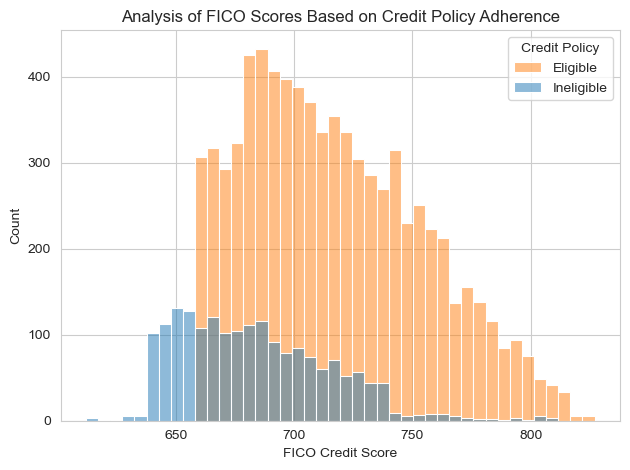

In [60]:
# Set plot style
sns.set_style(style='whitegrid')

# Create histogram
sns.histplot(data=loan_data, x='fico', hue='credit.policy')

# Update legend and titles
plt.legend(title='Credit Policy', labels=['Eligible', 'Ineligible'])
plt.title('Analysis of FICO Scores Based on Credit Policy Adherence')
plt.xlabel('FICO Credit Score')

# Adjust layout
plt.tight_layout()

Anyone having a credit score lower than 660 will not be eligible for the policy.

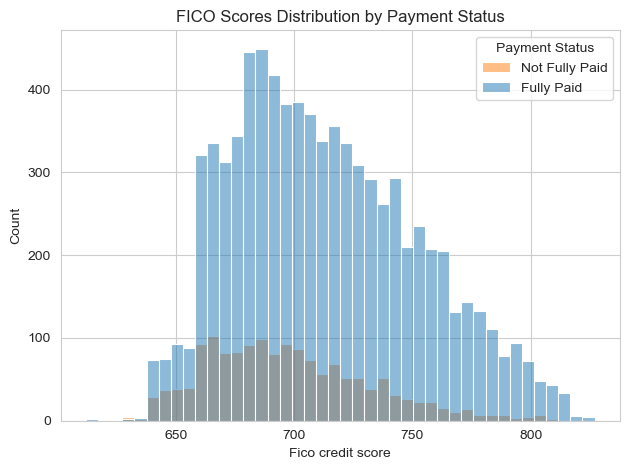

In [62]:

sns.histplot(data=loan_data, x='fico', hue='not.fully.paid')

# Update the graph parameters
plt.legend(title='Payment Status', labels=['Not Fully Paid', 'Fully Paid'])
plt.title('FICO Scores Distribution by Payment Status')
plt.xlabel('Fico credit score')
plt.tight_layout()

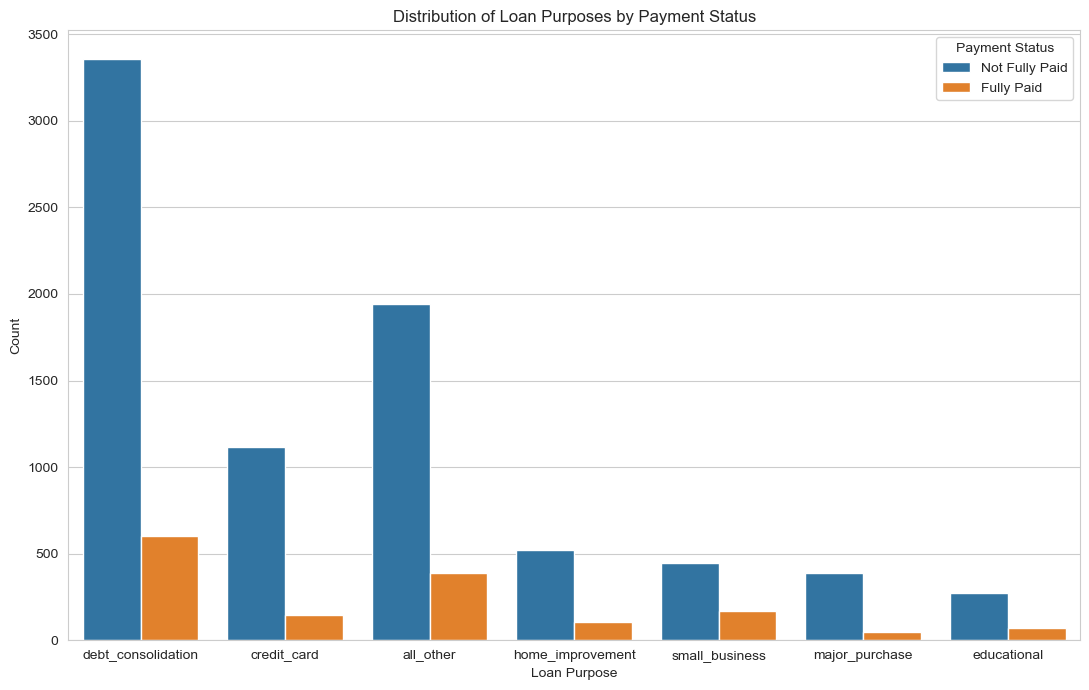

In [64]:
# Creating the count plot
plt.figure(figsize=(11,7))
sns.countplot(data=loan_data, x='purpose', hue='not.fully.paid')

# Adding title and axis labels ß
plt.title('Distribution of Loan Purposes by Payment Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Payment Status', labels=['Not Fully Paid', 'Fully Paid'])

# Adjusting layout to make space for rotated labels
plt.tight_layout()

# Display the plot
plt.show()

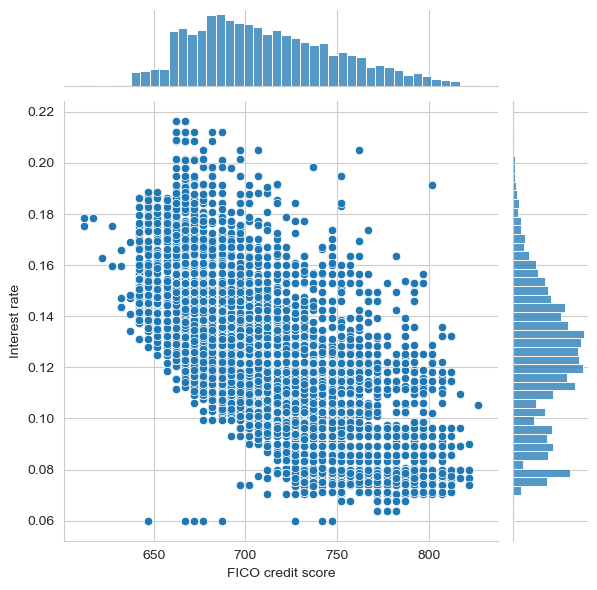

In [66]:
# Creating the joint plot
sns.jointplot(data=loan_data, x='fico', y='int.rate')

# Adding title and axis labels ß
plt.xlabel('FICO credit score')
plt.ylabel('Interest rate')

# Display the plot
plt.show()

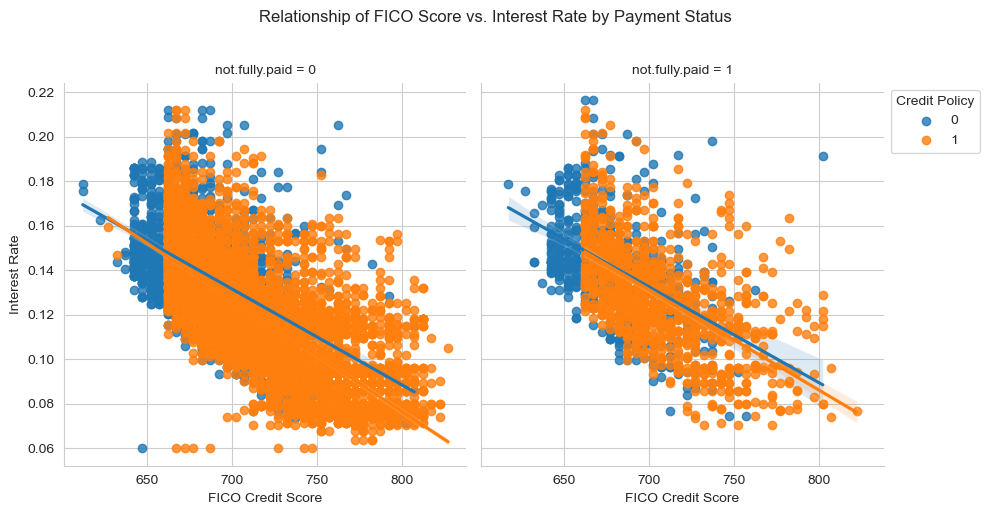

In [78]:
# Create lmplot with subplots based on 'not.fully.paid'
plot = sns.lmplot(data=loan_data, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', legend=False)

# Set title
plot.figure.suptitle('Relationship of FICO Score vs. Interest Rate by Payment Status', y=1.02)

# Set x and y labels for both plots
plot.set_xlabels('FICO Credit Score')
plot.set_ylabels('Interest Rate')

# Move legend outside of the plot
plt.legend(title='Credit Policy', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Data Preprocessing



In [21]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features



In [79]:
cat_feats = ['purpose']

In [83]:
# Transform the categorical column into dummie variables
final_data = pd.get_dummies(loan_data,columns=cat_feats,drop_first=True) 

# Convert boolean columns to integers (0 and 1)
final_data = final_data.astype(int)

In [84]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,11,19,737,5639,28854,52,0,0,0,0,0,1,0,0,0,0
1,1,0,228,11,14,707,2760,33623,76,0,0,0,0,1,0,0,0,0,0
2,1,0,366,10,11,682,4710,3511,25,1,0,0,0,0,1,0,0,0,0
3,1,0,162,11,8,712,2699,33667,73,1,0,0,0,0,1,0,0,0,0
4,1,0,102,11,14,667,4066,4740,39,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,344,12,10,672,10474,215372,82,2,0,0,1,0,0,0,0,0,0
9574,0,0,257,11,0,722,4380,184,1,5,0,0,1,0,0,0,0,0,0
9575,0,0,97,10,13,687,3450,10036,82,8,0,0,1,0,1,0,0,0,0
9576,0,0,351,10,19,692,1800,0,3,5,0,0,1,0,0,0,1,0,0


## Train Test Split


In [26]:
from sklearn.model_selection import train_test_split


In [87]:
# Split the data based on parameters (X) and target variable (y)
X = final_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

In [88]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model



In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier()

In [91]:
# Train 
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [92]:
# Predict 
dt_pred = dtree.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
# Print classification report to evaluate model performance
print("Decision Tree Classifier Performance:")
print(classification_report(y_true=y_test, y_pred=dt_pred))


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [104]:
# Print confusion matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=dt_pred))

Confusion Matrix:
[[2002  429]
 [ 340  103]]


## Training the Random Forest model



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300)

In [96]:
# Train
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation


In [97]:
# Predict
rf_pred = rf.predict(X_test)

In [105]:
# Print classification report to evaluate model performance
print("Random Forest Classifier Performance:")
print(classification_report(y_true=y_test, y_pred=rf_pred))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [99]:
# Print confusion matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=rf_pred))

[[2421   10]
 [ 432   11]]


In [102]:
# Determine whether the target class is balancedß
class_counts = loan_data['not.fully.paid'].value_counts()
class_counts

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

# Conclusion

Given the imbalance in the dataset regarding the target variable "Not Fully Paid," it is crucial to prioritize the F1 score over accuracy when evaluating model performance.

Overall, the random forest model outperformed the decision tree model. However, considering our goal of predicting whether clients can repay their debts accurately, the decision tree model might be more suitable. This is supported by its more even F1 score (approximately 0.21 for class 1 and 0.84 for class 0), compared to the random forest's scores (0.05 for class 1 and 0.92 for class 0).

Predicting class 1 (individuals who may not repay their debts) is more critical than correctly classifying those who can pay, due to the potential significant losses involved. Furthermore, both models showed high predictive accuracy for class 0 (individuals who could repay their debts), underscoring the importance of prioritizing the prediction of class 1.

